In [2]:
import cv2
import numpy as np
import os
import random

In [9]:
import cv2
import numpy as np
import os
import random

# Function to perform random augmentations
def augment_image(image):
    rows, cols, channels = image.shape
    
    # Random rotation
    angle = random.choice([90, 180, 270])
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated = cv2.warpAffine(image, M, (cols, rows))
    
    # Random flip (horizontal and vertical)
    flip_type = random.choice([-1, 0, 1])  # -1: both axes, 0: vertical, 1: horizontal
    flipped = cv2.flip(rotated, flip_type)
    
    # Random scaling
    scale = random.uniform(0.8, 1.2)
    scaled = cv2.resize(flipped, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
    
    # Random translation (shifting)
    tx, ty = random.randint(-20, 20), random.randint(-20, 20)
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    shifted = cv2.warpAffine(scaled, translation_matrix, (cols, rows))
    
    # Random cropping
    crop_size = random.uniform(0.7, 1.0)  # Crop between 70% to 100% of original size
    crop_x = int(cols * crop_size)
    crop_y = int(rows * crop_size)
    x_start = random.randint(0, cols - crop_x)
    y_start = random.randint(0, rows - crop_y)
    cropped = shifted[y_start:y_start + crop_y, x_start:x_start + crop_x]
    cropped_resized = cv2.resize(cropped, (cols, rows))  # Resize back to original dimensions
    
    # Random brightness and contrast adjustments
    brightness = random.randint(-30, 30)
    contrast = random.uniform(0.8, 1.2)
    brightness_contrast_adjusted = cv2.convertScaleAbs(cropped_resized, alpha=contrast, beta=brightness)
    
    # Random color shift (ensure type compatibility)
    b_shift = random.randint(-20, 20)
    g_shift = random.randint(-20, 20)
    r_shift = random.randint(-20, 20)
    color_shift = np.array([b_shift, g_shift, r_shift], dtype=np.int16).reshape(1, 1, 3)  # Create shift array
    
    # Ensure image is in int16 format for adding, then clip and convert back to uint8
    image_int16 = brightness_contrast_adjusted.astype(np.int16)
    color_shifted = image_int16 + color_shift  # Add the color shift
    color_shifted = np.clip(color_shifted, 0, 255)  # Clip values to stay within [0, 255]
    color_shifted = color_shifted.astype(np.uint8)  # Convert back to uint8
    
    return color_shifted


# Function to augment dataset
def augment_dataset(input_dir, output_dir, num_augmentations=5):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path)

            # Save original image to output dir
            image = cv2.resize(image, (75, 100))
            cv2.imwrite(os.path.join(output_dir, filename), image)

            # Perform augmentations
            for i in range(num_augmentations):
                augmented_image = augment_image(image)
                augmented_image = cv2.resize(augmented_image, (75, 100))
                new_filename = f"{os.path.splitext(filename)[0]}_aug_{i}.jpg"
                cv2.imwrite(os.path.join(output_dir, new_filename), augmented_image)

# Example usage
path = "D:/Code/NHAP_MON_AI/Project/BLS/dataset_root/train"
path_cp = "D:/Code/NHAP_MON_AI/Project/BLS/dataset_aug/train"
ls = os.listdir(path) 
for folder in ls: 
    input_dir = f"{path}/{folder}"
    output_dir = f"{path_cp}/{folder}"
    augment_dataset(input_dir, output_dir, num_augmentations=10)

In [1]:
path = "D:/Code/NHAP_MON_AI/Project/BLS/dataset_aug/train"
path2 = "D:/Code/NHAP_MON_AI/Project/BLS/dataset_copy/train"
ls = os.listdir(path)  
for folder in ls:
    path_file = os.listdir(f"{path}/{folder}")
    for name in path_file:
        path_img = f"{path}/{folder}/{name}"
        image = cv2.imread(path_img)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image_gray = image_gray.astype(np.float32)
        target_folder = f"{path2}/{folder}"
        if not os.path.exists(target_folder):
            os.makedirs(target_folder)
        cv2.imwrite(f"{target_folder}/{name}", image_gray)


        

NameError: name 'os' is not defined

In [11]:
i = 1
char_to_num = {chr(i): i - ord('A') for i in range(ord('A'), ord('Z') + 1)}
path2 = "D:/Code/NHAP_MON_AI/Project/BLS/dataset_copy/train"
ls = os.listdir(path2)
target = np.eye(len(ls))
X = []
Y = []
for folder in ls:
    path_file = os.listdir(f"{path2}/{folder}")
    for name in path_file:
        path_img = f"{path2}/{folder}/{name}"
        image = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
        image = image.astype(np.float32)
        image = cv2.normalize(image, image, 0, 1.0, cv2.NORM_MINMAX)
        image = image.reshape((1, 7500))
        image = image[0]
        X.append(image)
        Y.append(target[char_to_num[folder]])
        print(f"processed {name:<30}:\t{i}/{len(path_file)*len(ls)}")
        i += 1
train_sample = zip(X, Y)
train_sample = list(train_sample)
random.shuffle(train_sample)
X, Y = zip(*train_sample)
X = np.array(X)
Y = np.array(Y)


processed image_0.jpg                   :	1/8580
processed image_0_aug_0.jpg             :	2/8580
processed image_0_aug_1.jpg             :	3/8580
processed image_0_aug_2.jpg             :	4/8580
processed image_0_aug_3.jpg             :	5/8580
processed image_0_aug_4.jpg             :	6/8580
processed image_0_aug_5.jpg             :	7/8580
processed image_0_aug_6.jpg             :	8/8580
processed image_0_aug_7.jpg             :	9/8580
processed image_0_aug_8.jpg             :	10/8580
processed image_0_aug_9.jpg             :	11/8580
processed image_1.jpg                   :	12/8580
processed image_10.jpg                  :	13/8580
processed image_10_aug_0.jpg            :	14/8580
processed image_10_aug_1.jpg            :	15/8580
processed image_10_aug_2.jpg            :	16/8580
processed image_10_aug_3.jpg            :	17/8580
processed image_10_aug_4.jpg            :	18/8580
processed image_10_aug_5.jpg            :	19/8580
processed image_10_aug_6.jpg            :	20/8580
processed

In [4]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(200, 200, 200, 200), activation='relu', solver='adam', max_iter=100, random_state=42 )
mlp.fit(X,Y)


C:\Users\nhann\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(200, 200, 200, 200), max_iter=100,
              random_state=42)

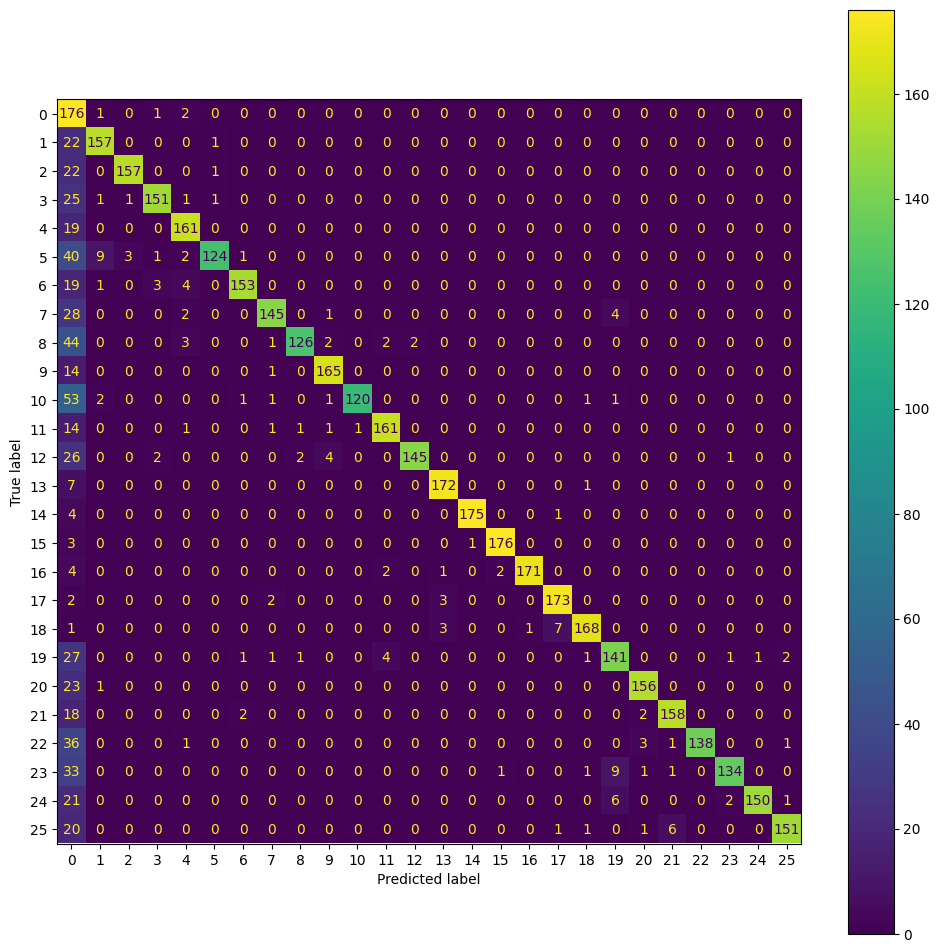

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np 
fig, ax = plt.subplots(figsize=(12, 12))
predictions = mlp.predict(X)
Y_multiclass = np.argmax(Y, axis=1)
predictions_multiclass = np.argmax(predictions, axis=1)
cm = confusion_matrix(Y_multiclass, predictions_multiclass)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax) 
plt.show()

In [29]:
import pickle
# # save to file
filename = 'BLS_model.sav'
pickle.dump(mlp, open(filename, 'wb'))